In [189]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [190]:
FILE_PATH = 'data/pilot2.json'
#pilot1.json has 3 anagrams - the, volvo, organic -- it failed most likely because configuration of organic was too easy for people
#pilot2.json has 3 anagrams - the, volvo, hammock -- there is some weak signal with this pilot, pilot 3 will tell us more. 
all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
len(all_entries)

60

In [191]:
start = []
finish = []
for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']
        start.append(entry)
    else:
        condition = entry['data'][0]
        finish.append(entry)
print(len(start),len(finish))

30 30


In [1]:
time_guess_1,time_guess_2,time_guess_3 = [],[],[] 
actual_rt_1,actual_rt_2,actual_rt_3 = [],[],[] 
pleasant_1, pleasant_2,pleasant_3 = [],[],[] 
aha_1, aha_2, aha_3 = [],[],[]
give_up_1, give_up_2, give_up_3 = [],[],[]

for entry in finish: 
    entry_data = entry['data']
    #data for THE anagram
    time_guess_1.append(entry_data[5]['response']) #5 is first time estimation

    counter = 6    
    rt = entry_data[6]['rt']
    attempt = entry_data[6]['responses'] 
    g = 0
    while "the" not in attempt.lower(): #keep incrementing until person gets correct answer or gives up
        if "next" in attempt.lower(): #break if person gave up
            g = 1
            break
        else:    
            counter = counter+1
            attempt = entry_data[counter]['responses']
            rt = rt+entry_data[counter]['rt']  
            
    give_up_1.append(g) #did subject give up or not
    actual_rt_1.append(rt) #append actual time to complete

    counter=counter+1
    r = entry_data[counter]['responses'] #pleasant-ness rating
    pleasant_1.append(int(r[6]))

    counter = counter+1
    r = entry_data[counter]['responses'] #aha rating
    aha_1.append(int(r[6]))

    #data for VOLVO anagram    
    counter = counter+3
    time_guess_2.append(entry_data[counter]['response']) #time estimation

    counter = counter+1   
    rt = entry_data[counter]['rt']
    attempt = entry_data[counter]['responses']
    g = 0
    while "volvo" not in attempt.lower(): #keep incrementing until person gets correct answer or gives up, 
        if "next" in attempt.lower(): #break if person gave up 
            g = 1 #person gave up
            break
        else:
            counter = counter+1
            attempt = entry_data[counter]['responses']
            rt = rt+entry_data[counter]['rt']   
    
    give_up_2.append(g)
    actual_rt_2.append(rt) #append actual time to complete

    counter=counter+1
    r = entry_data[counter]['responses'] #pleasant-ness rating
    pleasant_2.append(int(r[6]))

    counter = counter+1
    r = entry_data[counter]['responses'] #aha rating
    aha_2.append(int(r[6]))

    #data for HAMMOCK anagram    
    counter = counter+3
    time_guess_3.append(entry_data[counter]['response']) #time estimation
    g = 0
    counter = counter+1   
    rt = entry_data[counter]['rt']
    attempt = entry_data[counter]['responses']    
    while "hammock" not in attempt.lower(): #keep incrementing until person gets correct answer or gives up        
        if "next" in attempt.lower(): #break if person gave up
            g = 1
            break
        else:            
            rt = rt+entry_data[counter]['rt']
            counter = counter+1
            attempt = entry_data[counter]['responses']    
            
    give_up_3.append(g) #add if subject gave up or not
    actual_rt_3.append(rt) #append actual time to complete
    
    counter=counter+1
    r = entry_data[counter]['responses'] #pleasant-ness rating
    pleasant_3.append(int(r[6]))

    counter = counter+1
    r = entry_data[counter]['responses'] #aha rating    
    aha_3.append(int(r[6]))
    
time_guess_1 = np.asarray(time_guess_1, dtype='float64')*60 
actual_rt_1 = np.asarray(actual_rt_1, dtype='float64')*0.001 
tpe_1 = time_guess_1-actual_rt_1

time_guess_2 = np.asarray(time_guess_2, dtype='float64')*60 
actual_rt_2 = np.asarray(actual_rt_2, dtype='float64')*0.001 
tpe_2 = time_guess_2-actual_rt_2

time_guess_3 = np.asarray(time_guess_3, dtype='float64')*60
actual_rt_3 = np.asarray(actual_rt_3, dtype='float64')*0.001 
tpe_3 = time_guess_3-actual_rt_3

NameError: name 'finish' is not defined

In [281]:
#clean up data

#remove people who gave up
indexes = [i for i,x in enumerate(give_up_1) if x == 0] #only get subjects who solved the anagram
aha_1 = np.asarray(aha_1)
time_guess_1 = time_guess_1[np.asarray(indexes)] 
actual_rt_1 = actual_rt_1[np.asarray(indexes)] 
tpe_1 = tpe_1[np.asarray(indexes)] 
aha_1 = aha_1[np.asarray(indexes)] #aha rating

indexes = [i for i,x in enumerate(give_up_2) if x == 0] #only get subjects who solved the anagram
aha_2 = np.asarray(aha_2)
time_guess_2 = time_guess_2[np.asarray(indexes)] 
actual_rt_2 = actual_rt_2[np.asarray(indexes)] 
tpe_2 = tpe_2[np.asarray(indexes)] 
aha_2 = aha_2[np.asarray(indexes)] #aha rating

indexes = [i for i,x in enumerate(give_up_3) if x == 0] #only get subjects who solved the anagram
aha_3 = np.asarray(aha_3)
time_guess_3 = time_guess_3[np.asarray(indexes)] 
actual_rt_3 = actual_rt_3[np.asarray(indexes)] 
tpe_3 = tpe_3[np.asarray(indexes)] 
aha_3 = aha_3[np.asarray(indexes)] #aha rating

#concatenate all arrays

aha = np.concatenate((aha_1,aha_2),axis=0)
aha = np.concatenate((aha,aha_3),axis=0)

give_up = np.concatenate((np.asarray(give_up_1),np.asarray(give_up_2)),axis=0)
give_up = np.concatenate((give_up,np.asarray(give_up_3)),axis=0)

time_guess = np.concatenate((time_guess_1, time_guess_2), axis = 0)
time_guess = np.concatenate((time_guess, time_guess_3), axis = 0)

actual_rt = np.concatenate((actual_rt_1, actual_rt_2), axis = 0)
actual_rt = np.concatenate((actual_rt, actual_rt_3), axis = 0)

tpe = np.concatenate((tpe_1, tpe_2), axis = 0)
tpe = np.concatenate((tpe, tpe_3), axis = 0)

0.16373381498714479

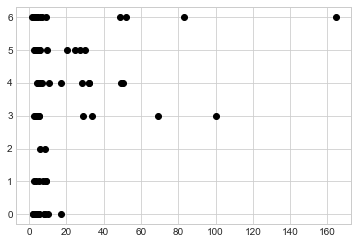

In [284]:
#global analysis
plt.style.use('seaborn-whitegrid')

plt.plot(actual_rt,aha, 'o', color='black') #change here
#correlate here
np.corrcoef(time_guess, aha)[0, 1]
np.corrcoef(actual_rt, aha)[0, 1]
np.corrcoef(tpe, aha)[0, 1]

In [289]:
#analysis of individual anagrams

print(np.mean(time_guess_1), np.mean(time_guess_2), np.mean(time_guess_3))
print(np.mean(actual_rt_1), np.mean(actual_rt_2), np.mean(actual_rt_3))
print(np.mean(tpe_1), np.mean(tpe_2), np.mean(tpe_3))
print(np.mean(aha_1), np.mean(aha_2), np.mean(aha_3))

5.0 79.3846153846 229.5
3.87053333333 10.8046538462 49.0344375
1.12946666667 68.5799615385 180.4655625
2.9 2.92307692308 4.25


In [288]:
#2 pilots worth running
#pilot 1 -- same but for higher number of anagrams (maybe 20 anagrams and do the plots of tpe vs aha for the 20 anagrams)
#pilot 2 -- you will need to do probing every x seconds for new time estimation

#also need to address problems with people simply googling the answers

30
